# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from utils import loadData, normalizeData, degexpand

# Preparing Data

In [2]:
# Load dataset
t, X = loadData()

# Normalize features and target values
X_n = normalizeData(X)
t_n = normalizeData(t)

# Select only the 3rd feature
X_1D = X_n[:, 2].reshape(-1, 1)

# Use the first 100 points
X_train = X_1D[:100]
t_train = t_n[:100]

# Defining Ridge Regression Function

In [3]:
def ridge_regression(Phi, t, lambd):
    """Computes weights for Ridge Regression using L2-regularization."""
    n_features = Phi.shape[1]
    I = np.identity(n_features)  # Identity matrix
    w = np.linalg.pinv(Phi.T @ Phi + lambd * I) @ Phi.T @ t
    return w

# Cross Validation

In [4]:
def cross_validate_ridge(X_train, t_train, degree, lambdas, k=10):
    """Performs k-fold cross-validation to determine best lambda for Ridge Regression."""

    kf = KFold(n_splits=k, shuffle=True, random_state=42)  # 10-Fold cross-validation
    avg_validation_errors = []

    for lambd in lambdas:
        validation_errors = []

        for train_index, val_index in kf.split(X_train):
            X_t, X_v = X_train[train_index], X_train[val_index]
            t_t, t_v = t_train[train_index], t_train[val_index]

            # Expand features using degree 8 polynomial basis
            Phi_t = degexpand(X_t, degree)
            Phi_v = degexpand(X_v, degree)

            # Train Ridge Regression Model
            w = ridge_regression(Phi_t, t_t, lambd)

            # Compute Validation Error (Mean Squared Error)
            t_pred_v = Phi_v @ w
            val_mse = np.mean((t_v - t_pred_v) ** 2)
            validation_errors.append(val_mse)

        # Compute Average Validation Error across all folds
        avg_validation_errors.append(np.mean(validation_errors))

    return avg_validation_errors

# Plots

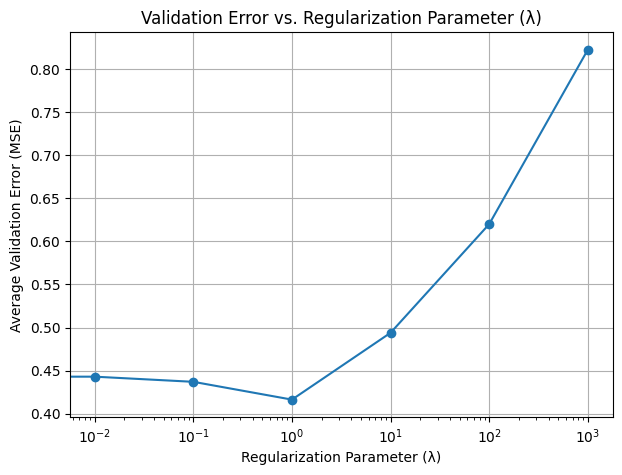

In [5]:
# Define lambda values for Ridge Regression
lambda_values = [0, 0.01, 0.1, 1, 10, 100, 1000]
degree = 8  # Given degree for polynomial basis

# Perform 10-Fold Cross-Validation
avg_validation_errors = cross_validate_ridge(X_train, t_train, degree, lambda_values)

# Plot Validation Error vs. Regularizer Value (Log Scale)
plt.figure(figsize=(7, 5))
plt.semilogx(lambda_values, avg_validation_errors, marker='o', linestyle='-')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('Average Validation Error (MSE)')
plt.title('Validation Error vs. Regularization Parameter (λ)')
plt.grid(True)
plt.show()

# Plot Analysis

Behavior at Low λ Values (Under-regularization)

When λ is very small (0.01, 0.1), the validation error is relatively high (~0.45).
This indicates that the model is still capturing noise (overfitting) in the training data.
The error decreases slightly as λ increases, meaning some regularization is beneficial.

Optimal Regularization (Best λ)

The lowest validation error (~0.41) occurs around λ = 1.
This suggests that a moderate amount of regularization reduces overfitting while still allowing the model to capture meaningful patterns.
This λ value is likely the best choice, as it minimizes generalization error.

Behavior at High λ Values (Over-regularization)

As λ increases beyond 1 (e.g., 10, 100, 1000), the validation error increases sharply.
This happens because large λ values impose a strong penalty on model complexity, forcing the model coefficients to become too small.
This results in an underfitting model that fails to capture important relationships in the data.